<a href="https://colab.research.google.com/github/Nikita-Vasinkov/StatPrak-HW/blob/master/dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('flights.csv', low_memory=False)
df2 = pd.read_csv('airports.csv', low_memory=False)
df3 = pd.read_csv('airlines.csv', low_memory=False)

mask = df1[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
df1 = df1.loc[~mask]
df1['DATE'] = pd.to_datetime(df1[['YEAR', 'MONTH', 'DAY']])
df1.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)
cols = list(df1.columns)
df1 = df1[cols[-1:] + cols[:-1]]
df1.head(10)


,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-01,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-01,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-01,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-01,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-01-01,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


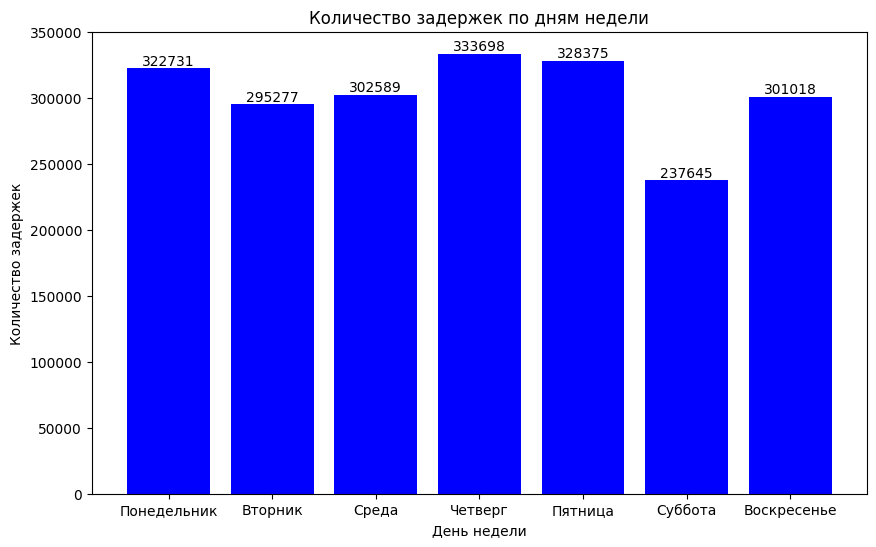

In [42]:
pos_delay = df1[df1['DEPARTURE_DELAY'] > 0]
delays_by_day = pos_delay.groupby('DAY_OF_WEEK').size().reset_index(name='DELAY_COUNT')
dow_map = {1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг', 5: 'Пятница', 6: 'Суббота', 7: 'Воскресенье'}
delays_by_day['DAY_OF_WEEK'] = delays_by_day['DAY_OF_WEEK'].map(dow_map)
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(delays_by_day['DAY_OF_WEEK'], delays_by_day['DELAY_COUNT'], color='blue')
for b in bars:
    ax.text(b.get_x() + b.get_width()/2, b.get_height(), f'{int(b.get_height())}', ha='center', va='bottom', fontsize=10)
ax.set_xlabel('День недели')
ax.set_ylabel('Количество задержек')
ax.set_title('Количество задержек по дням недели')

plt.show()



В понедельник, четверг и пятницу фиксируется наибольшее количество задержек, что требует дальнейшего анализа ситуации.

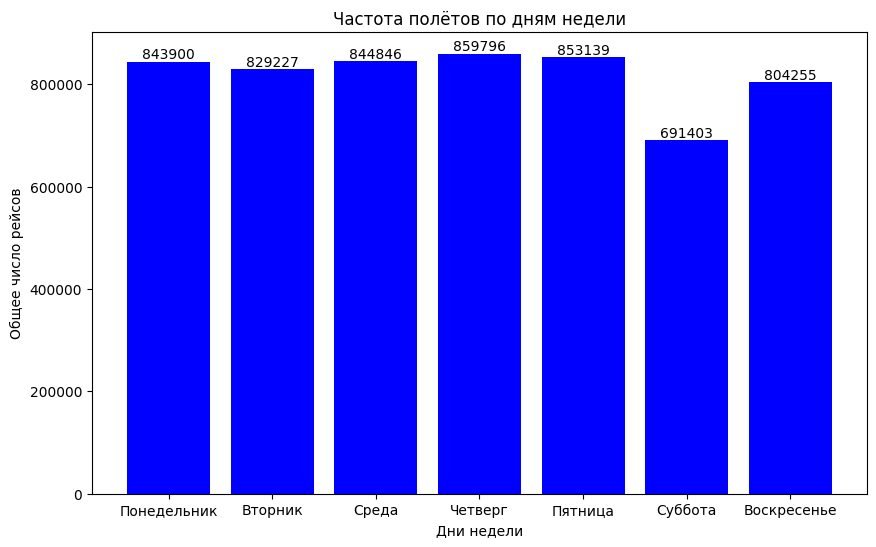

In [41]:
flights_stats = df1.groupby('DAY_OF_WEEK').size().reset_index(name='TOTAL_FLIGHTS')
weekday_names = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
flights_stats['DAY_OF_WEEK'] = flights_stats['DAY_OF_WEEK'].map(lambda x: weekday_names[x-1])

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(flights_stats['DAY_OF_WEEK'], flights_stats['TOTAL_FLIGHTS'], color='blue')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Дни недели')
ax.set_ylabel('Общее число рейсов')
ax.set_title('Частота полётов по дням недели')


plt.show()


Рейсы распределены относительно равномерно, за исключением субботы, когда количество рейсов ниже, но и задержек меньше. Чтобы выявить аномалии, рассмотрим процент задержек от общего числа рейсов по дням недели.

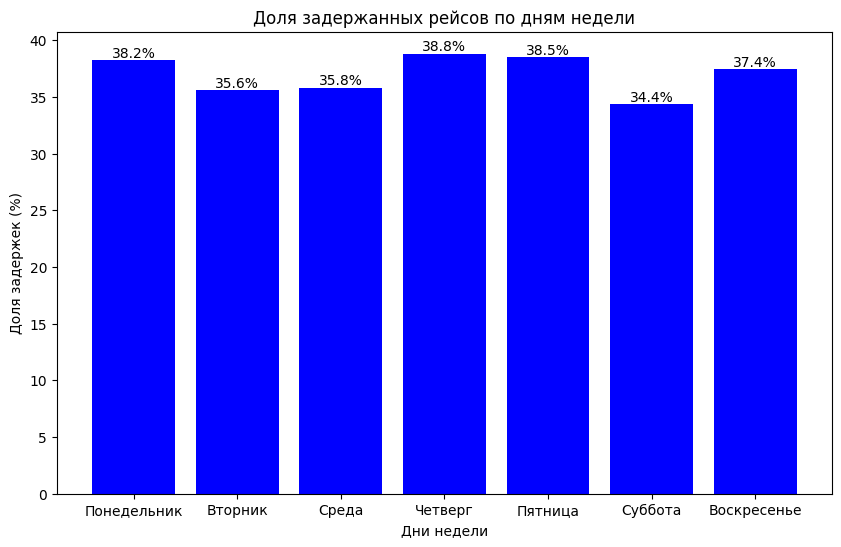

In [40]:
delays_ratio = pd.merge(delays_by_day, flights_stats, on='DAY_OF_WEEK')
delays_ratio['DELAY_PERCENT'] = (delays_ratio['DELAY_COUNT'] / delays_ratio['TOTAL_FLIGHTS']) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(delays_ratio['DAY_OF_WEEK'], delays_ratio['DELAY_PERCENT'], color='blue')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}%',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Дни недели')
ax.set_ylabel('Доля задержек (%)')
ax.set_title('Доля задержанных рейсов по дням недели')


plt.show()


Сравнив этот график с предыдущим, можно заметить, что с увеличением числа рейсов растет и процент задержек: в понедельник, четверг и пятницу нагрузка на аэропорты максимальна, что объясняет высокий процент задержек.

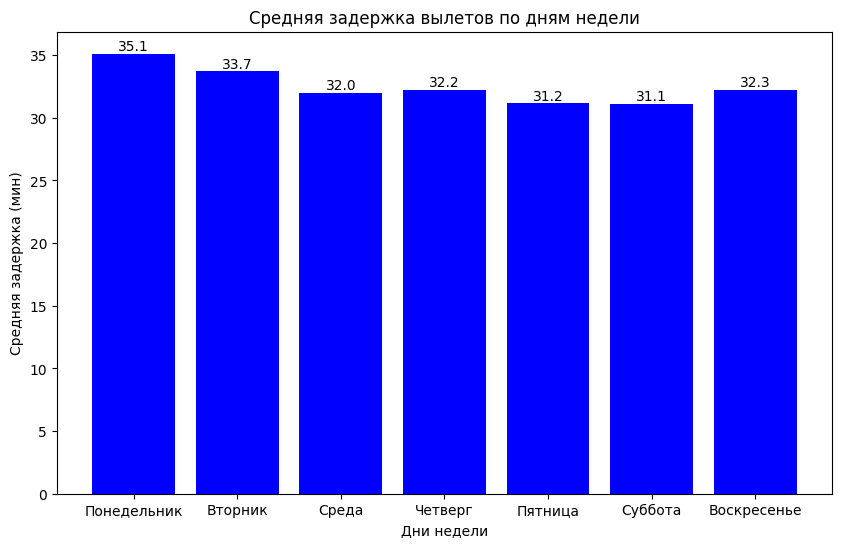

In [43]:
delayed_flights = df1[df1['DEPARTURE_DELAY'] > 0]
avg_delays = delayed_flights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean().reset_index(name='AVG_DELAY')

weekdays = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
avg_delays['DAY_OF_WEEK'] = avg_delays['DAY_OF_WEEK'].map(lambda x: weekdays[x-1])

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(avg_delays['DAY_OF_WEEK'], avg_delays['AVG_DELAY'], color='blue')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Дни недели')
ax.set_ylabel('Средняя задержка (мин)')
ax.set_title('Средняя задержка вылетов по дням недели')


plt.show()


Здесь ситуация немного иная: наибольшее среднее время задержки наблюдается в понедельник, а в остальные дни оно не сильно различается. Это, вероятно, связано с увеличением числа рейсов в начале рабочей недели.

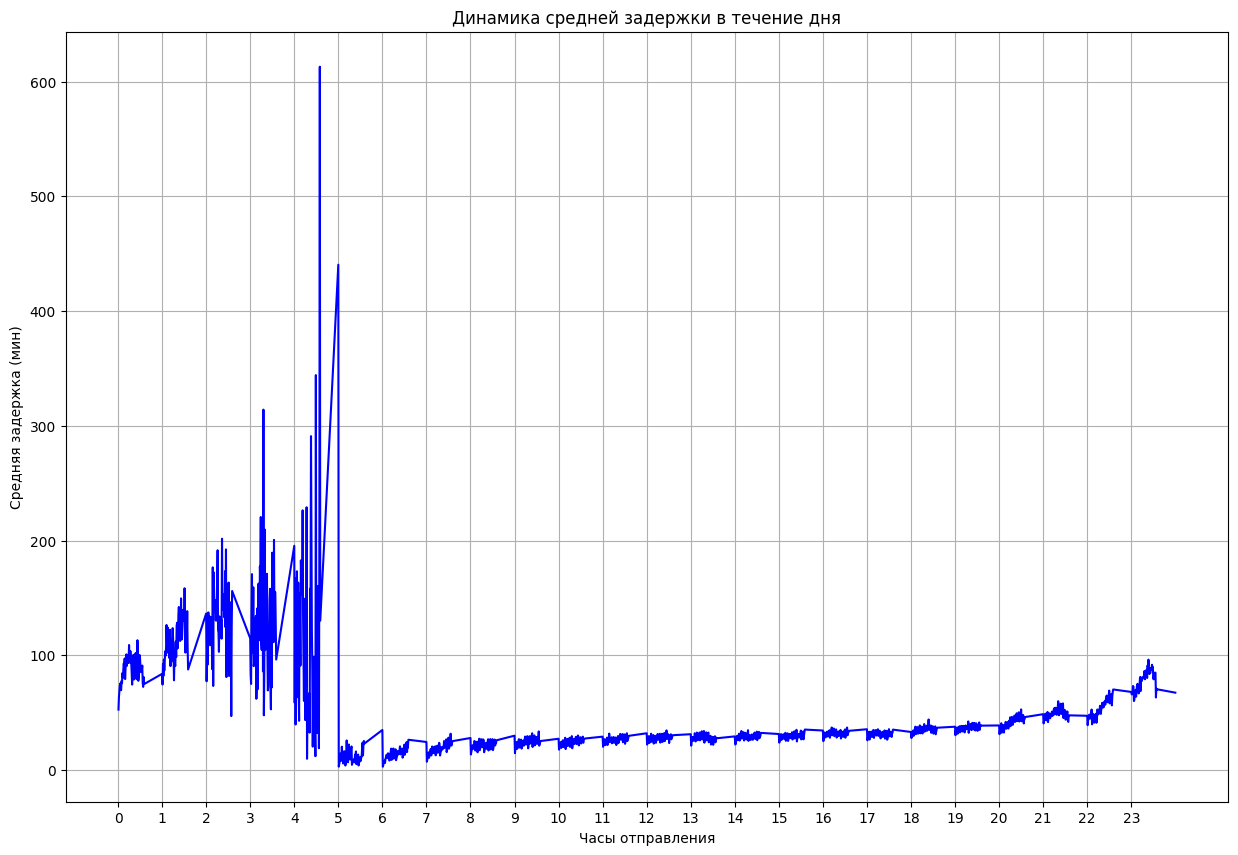

In [12]:
delayed_flights = df1[df1['DEPARTURE_DELAY'] > 0]
avg_delay_by_time = delayed_flights.groupby('DEPARTURE_TIME')['DEPARTURE_DELAY'].mean().reset_index(name='AVG_DELAY')

plt.figure(figsize=(15, 10))
plt.plot(avg_delay_by_time['DEPARTURE_TIME'] / 100, avg_delay_by_time['AVG_DELAY'], color='blue')

plt.grid()
plt.xlabel('Часы отправления')
plt.ylabel('Средняя задержка (мин)')
plt.title('Динамика средней задержки в течение дня')
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])

plt.show()


Наибольшие задержки происходят ночью, в то время как днем среднее время задержки значительно ниже. Это может быть связано с ухудшением видимости в ночное время или с нехваткой персонала в ночную смену.

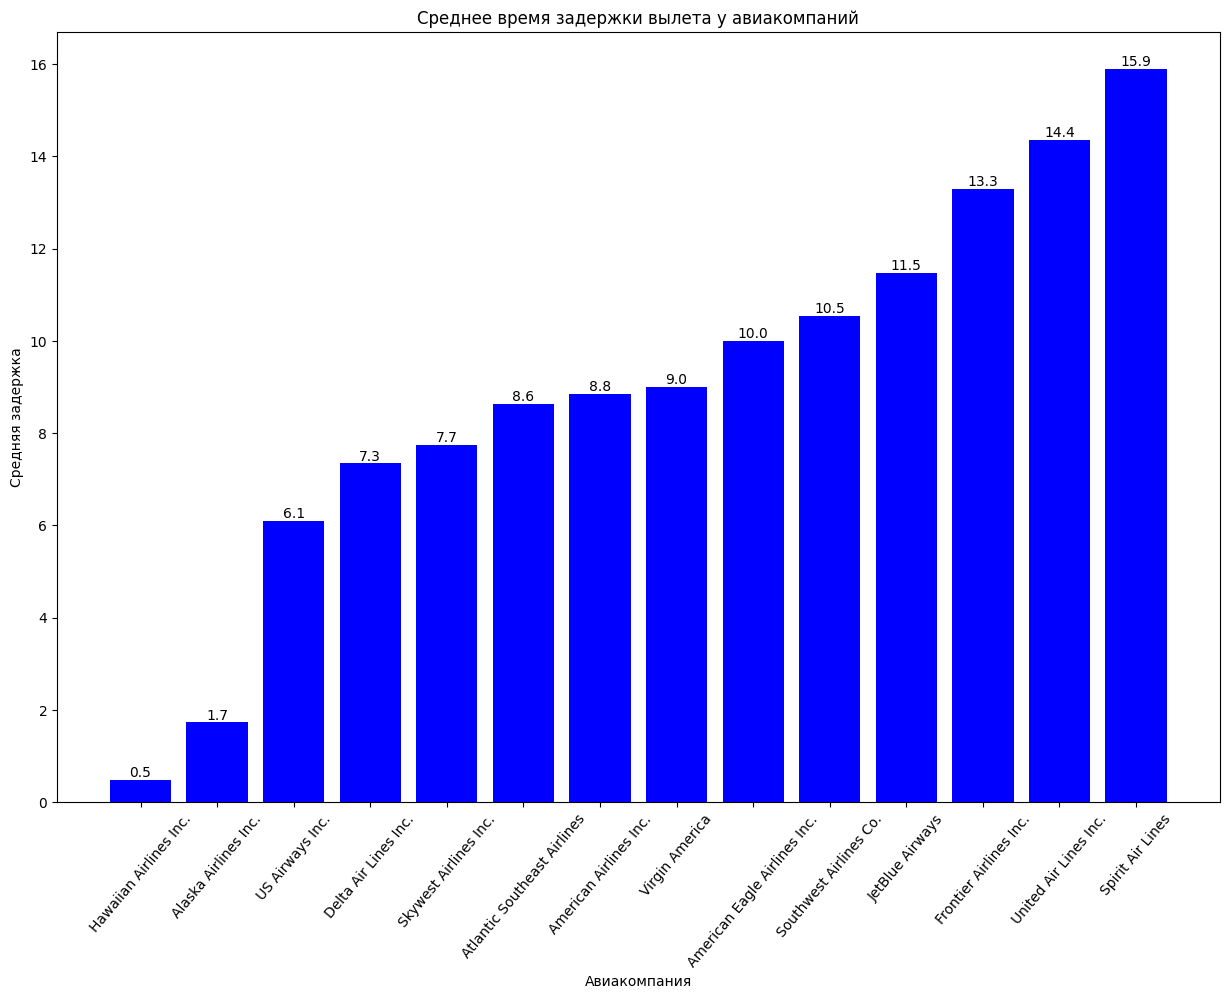

In [37]:
flights_with_airlines = pd.merge(filtered_df, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineavgdelay = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values().reset_index(name = 'DELAY_AVG')
plt.figure(figsize=(15, 10))
bars = plt.bar(airlineavgdelay['AIRLINE_y'], airlineavgdelay['DELAY_AVG'], color = 'blue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Среднее время задержки вылета у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка')
plt.xticks(rotation=50)
plt.show()




Мы выявили компанию с наибольшим средним временем задержки — Frontier Airlines. Хотя это может указывать на низкую эффективность, важно рассмотреть и другие метрики, например, сравнить количество задержек рейсов этой компании с другими.

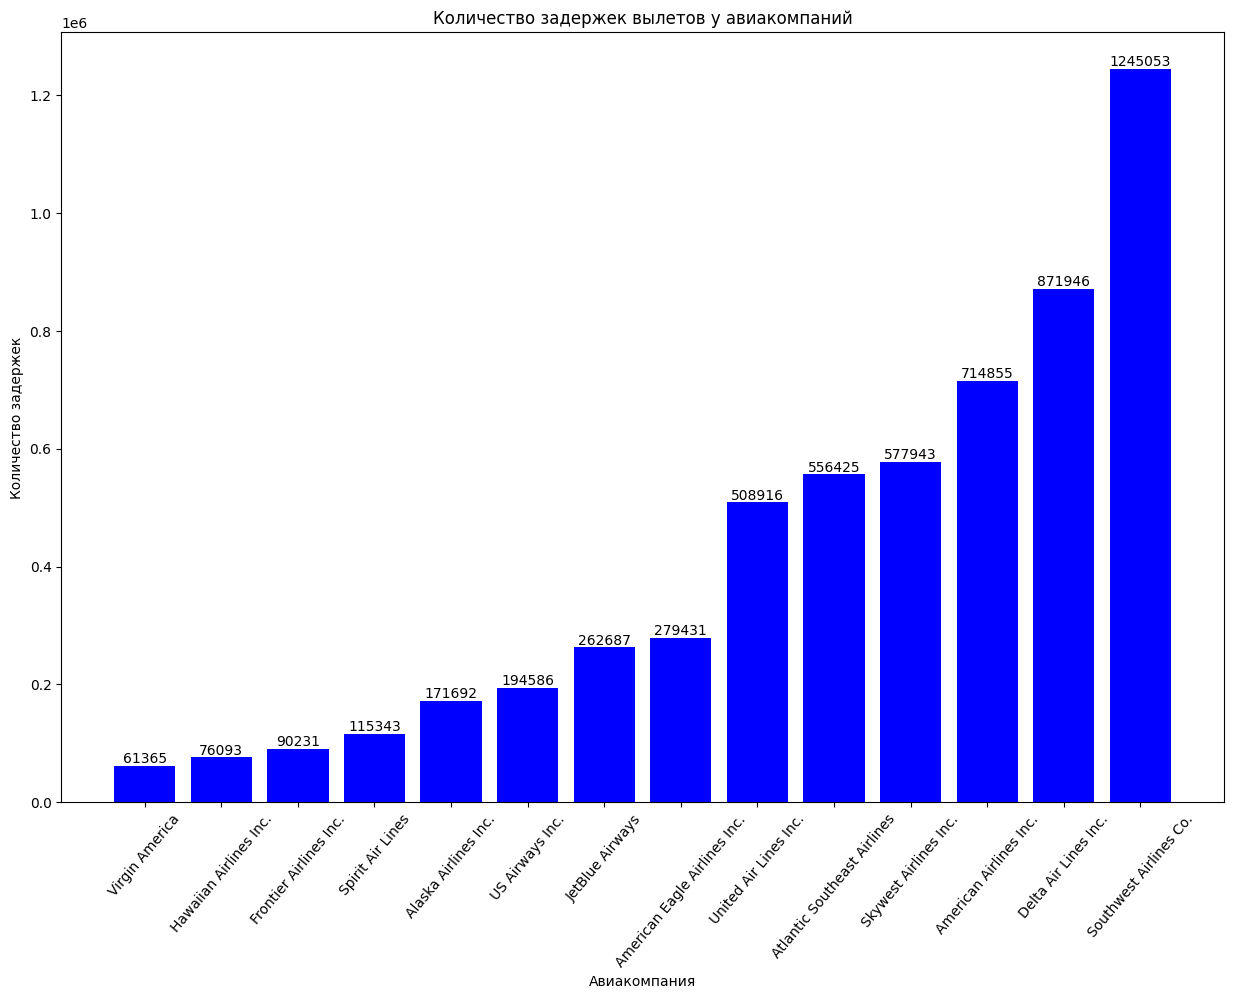

In [36]:
flights_with_airlines = pd.merge(filtered_df, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineavgdelay = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].size().sort_values().reset_index(name='DELAY_COUNT')

plt.figure(figsize=(15, 10))
bars = plt.bar(airlineavgdelay['AIRLINE_y'], airlineavgdelay['DELAY_COUNT'], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.title('Количество задержек вылетов у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Количество задержек')
plt.xticks(rotation=50)
plt.show()


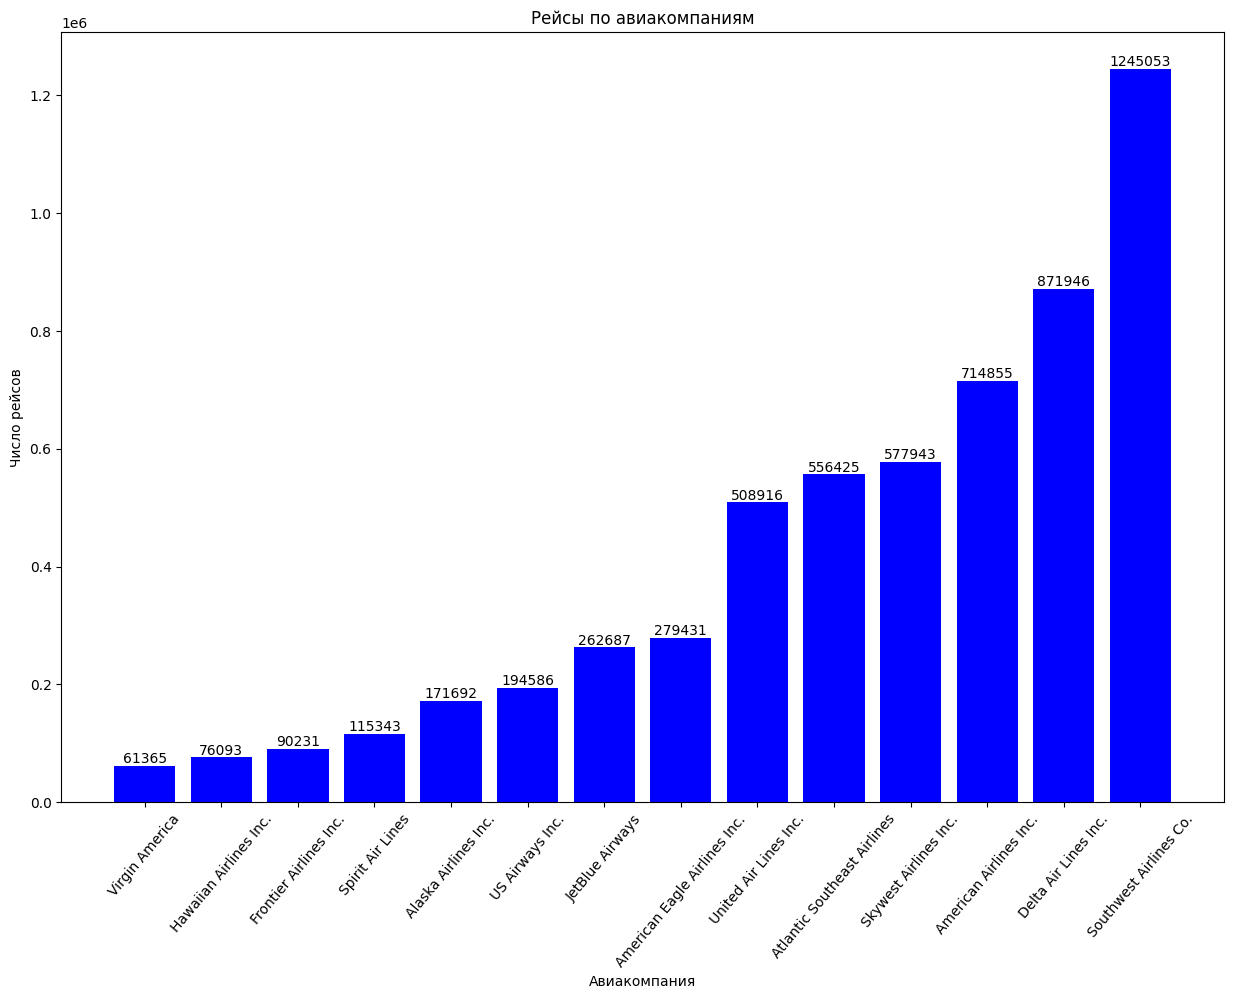

In [35]:
flights_with_airlines = pd.merge(df1, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airline_flight_counts = flights_with_airlines.groupby('AIRLINE_y').size().reset_index(name='FLIGHT_COUNT').sort_values('FLIGHT_COUNT')

plt.figure(figsize=(15, 10))
bars = plt.bar(airline_flight_counts['AIRLINE_y'], airline_flight_counts['FLIGHT_COUNT'], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.title('Рейсы по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Число рейсов')
plt.xticks(rotation=50)
plt.show()


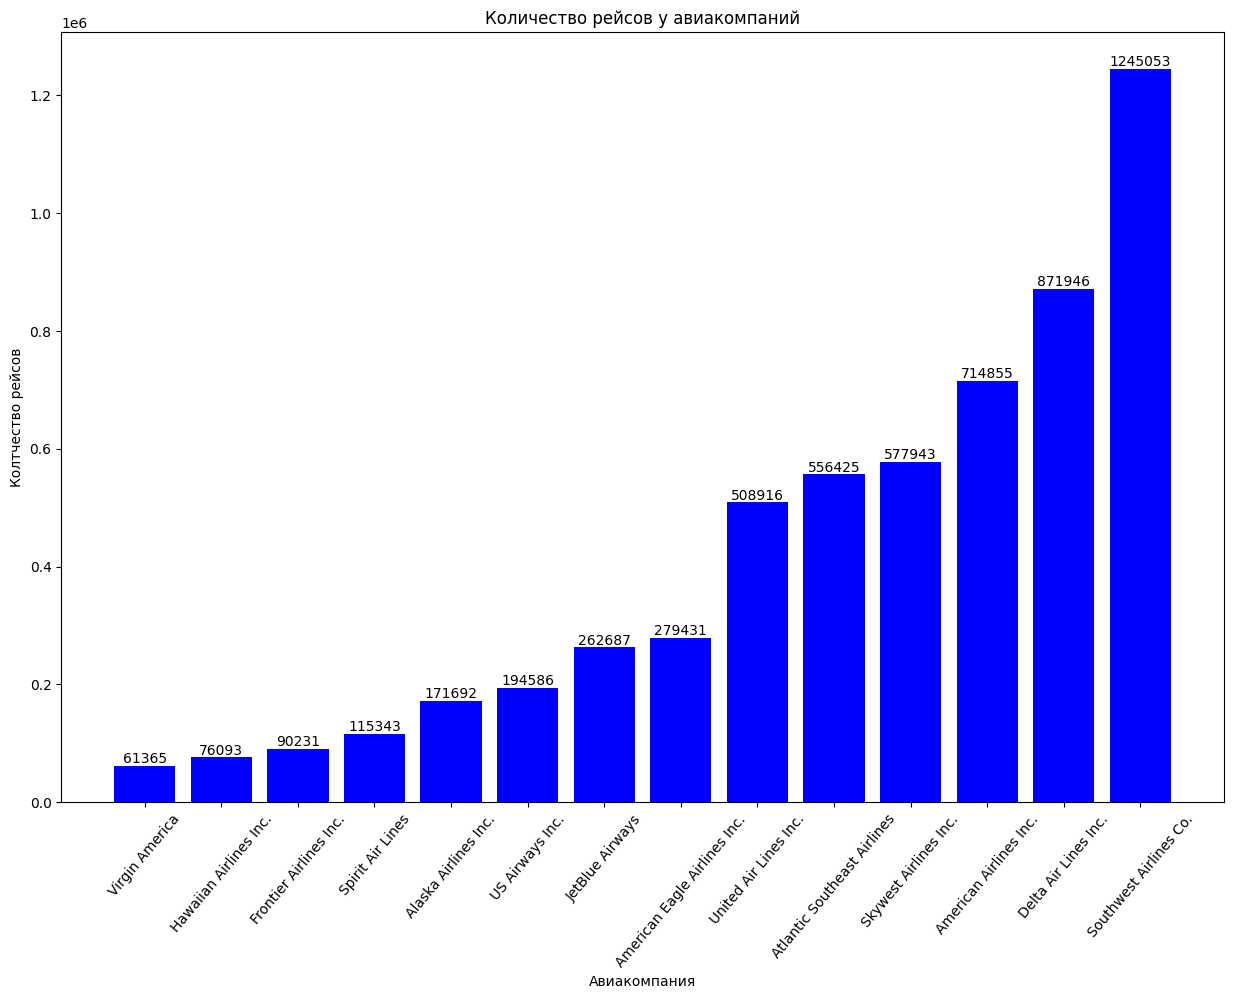

In [34]:
percentofdelay = pd.merge(airlineavgdelay, airline_flight_counts, on = 'AIRLINE_y', how = 'left')
percentofdelay['DELAY_RATIO'] = percentofdelay['DELAY_COUNT'] / percentofdelay['FLIGHT_COUNT']*100

plt.figure(figsize=(15, 10))

bars = plt.bar(airline_flight_counts['AIRLINE_y'], airline_flight_counts['FLIGHT_COUNT'], color = 'blue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
plt.title('Количество рейсов у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Колтчество рейсов')
plt.xticks(rotation=50)
plt.show()



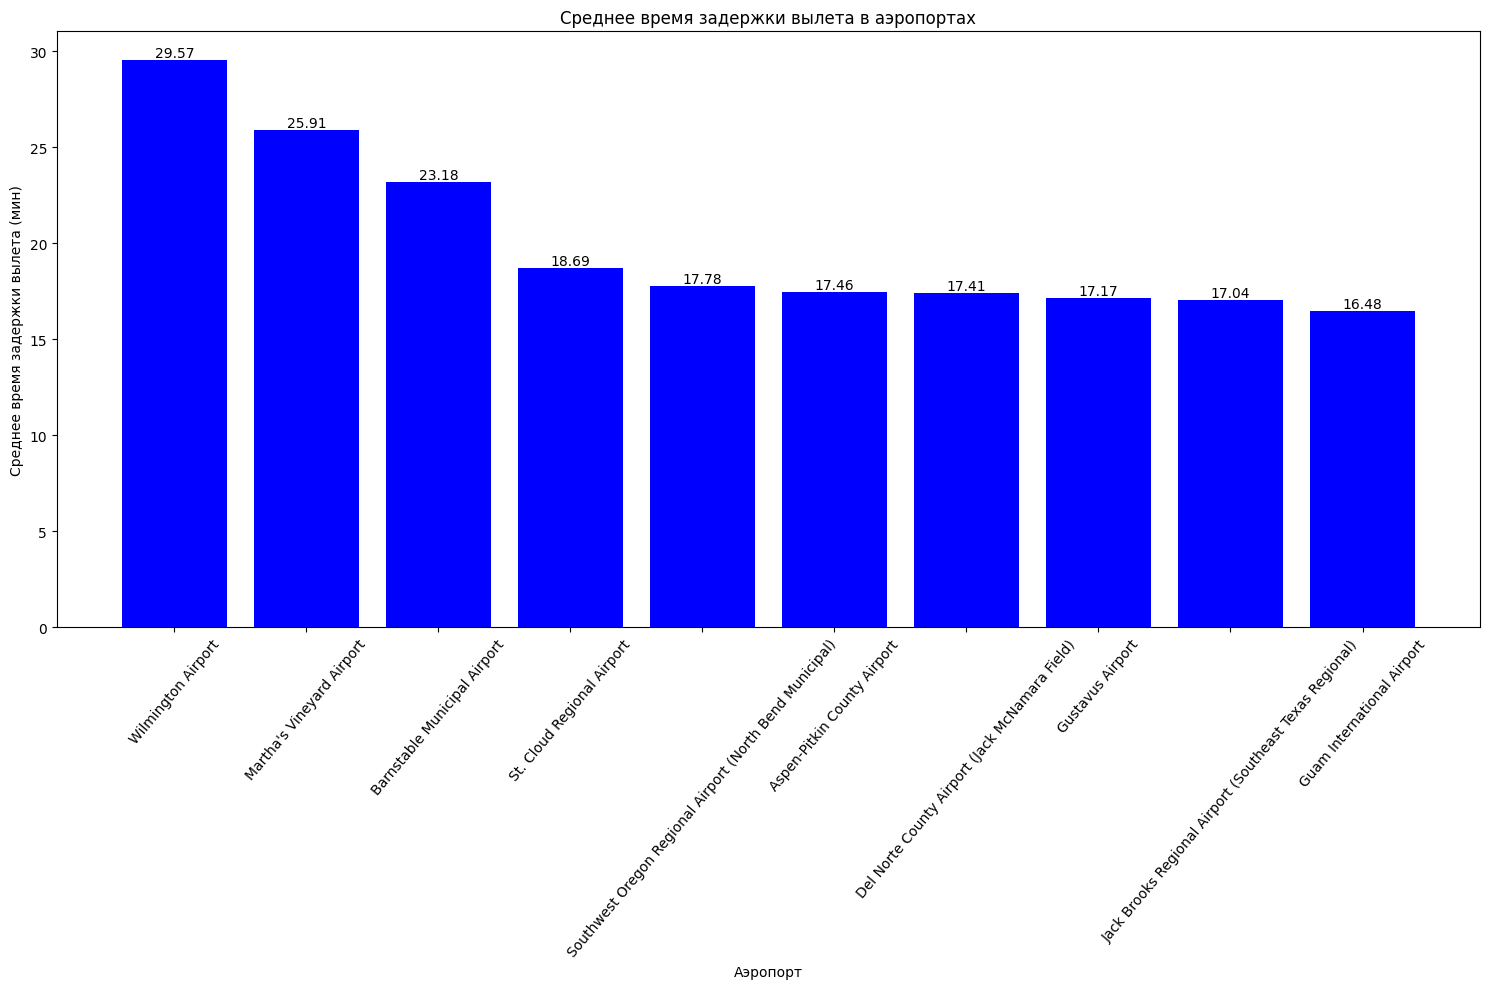

In [47]:
avg_delay_by_airport = filtered_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
avg_delay_by_airport.columns = ['IATA_CODE', 'AVG_DEPARTURE_DELAY']
airports_with_delay = pd.merge(df2, avg_delay_by_airport, on='IATA_CODE', how='left')
top_airports_delay = airports_with_delay.nlargest(10, 'AVG_DEPARTURE_DELAY')

plt.figure(figsize=(15, 10))
bars = plt.bar(top_airports_delay['AIRPORT'], top_airports_delay['AVG_DEPARTURE_DELAY'], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Среднее время задержки вылета в аэропортах')
plt.xlabel('Аэропорт')
plt.ylabel('Среднее время задержки вылета (мин)')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



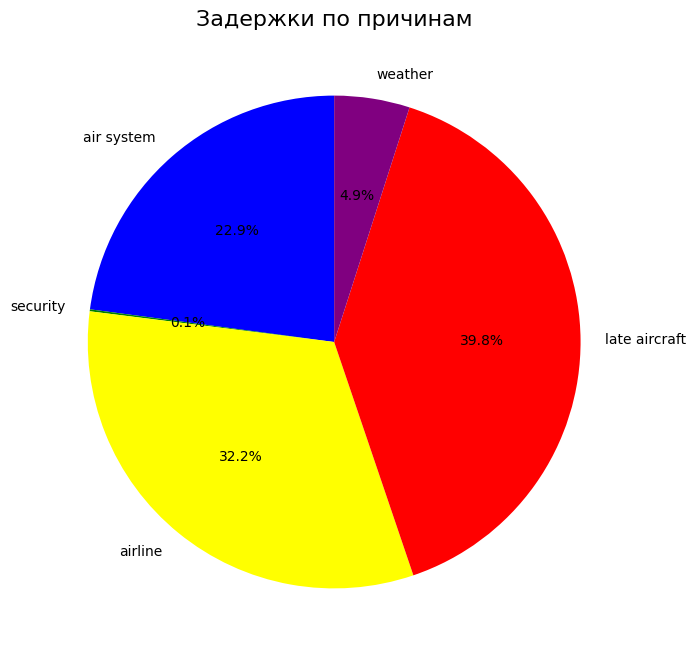

In [49]:
delay_causes = filtered_df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
labels = ['air system', 'security', 'airline', 'late aircraft', 'weather']
plt.figure(figsize=(8, 8))
plt.pie(delay_causes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'yellow', 'red', 'purple'])
plt.title('Задержки по причинам', fontsize=16)
plt.show()

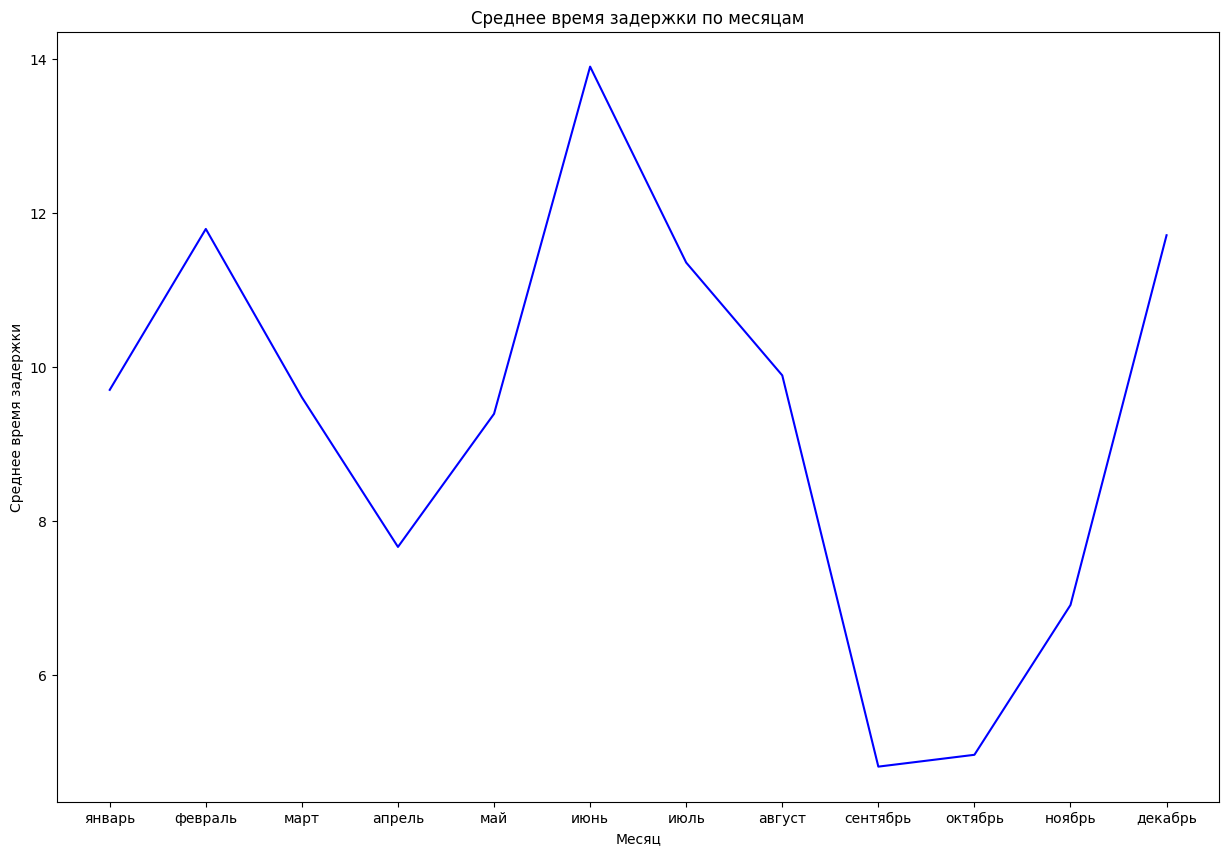

In [54]:
filtered_df['MONTH'] = filtered_df['DATE'].dt.month
monthly_delay = filtered_df.groupby('MONTH')['DEPARTURE_DELAY'].mean().reset_index(name = 'MONTHLY_DELAY')
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
monthly_delay['MONTH'] = monthly_delay['MONTH'].map(lambda x: months[x-1])
plt.figure(figsize = (15, 10))
plt.plot(monthly_delay['MONTH'], monthly_delay['MONTHLY_DELAY'], color = 'blue')

plt.xlabel('Месяц')
plt.ylabel('Среднее время задержки')
plt.title('Среднее время задержки по месяцам')

plt.show()

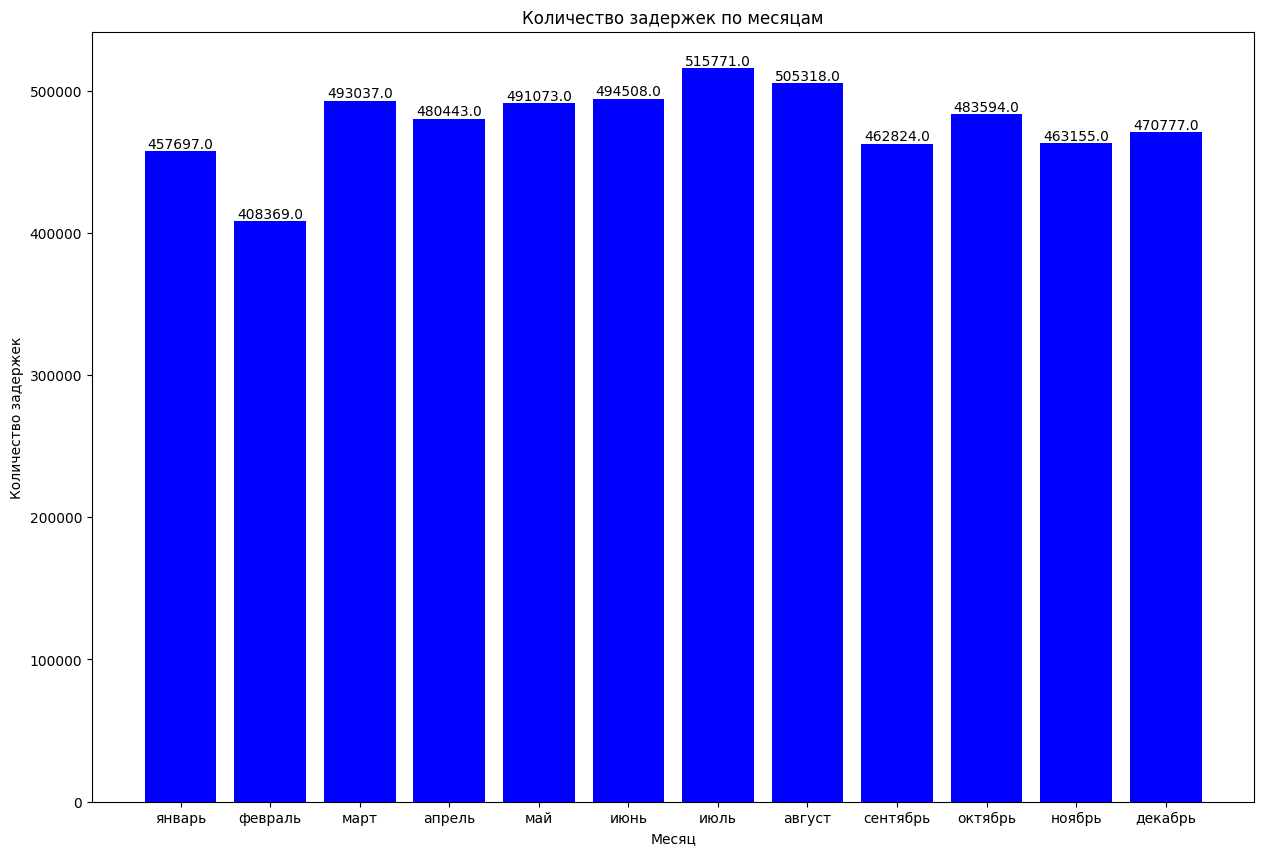

In [56]:
df1['MONTH'] = df1['DATE'].dt.month
flightcount_df = df1.groupby('MONTH').size().reset_index(name='FLIGHT_COUNT')
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
flightcount_df['MONTH'] = flightcount_df['MONTH'].map(lambda x: months[x-1])
plt.figure(figsize = (15, 10))
bars = plt.bar(flightcount_df['MONTH'], flightcount_df['FLIGHT_COUNT'], color = 'blue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Месяц')
plt.ylabel('Количество задержек')
plt.title('Количество задержек по месяцам')


plt.show()